$\color{green}{\text{This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.}}$

# Lab 4 (Weeks 10,11): Linear Regression

<div class="alert alert-block alert-info">
<b>Enter you credentials below</b>

- <b>Student Name:</b> Nigel Tan Jin Chun
- <b>Student ID:</b> 32194471
- <b>Date:</b> 11/5/2022
</div>

## Linear Regression

_Linear regression_, as the name implies, finds the _best fit line_ (or plane/hyperplane in high-dimensional spaces) between the _independent_ and _dependent_ variable (i.e., input data and target output). Recall that we approached the univariate linear regression in the class first and built our way up to multivariate input/output forms. Univariate linear regression describes the situation where only one independent variable is presented (i.e., $x \in \mathbb{R}$) and the model has to find the linear relationship of it with the dependent variable (i.e., $y$). In the multivariate form, we have more than one independent variable (i.e., $\boldsymbol{x} \in \mathbb{R}^n$) and the model may have multiple outputs to predict (i.e., $\boldsymbol{y} \in \mathbb{R}^p$). <br> 
If you want to have a quick wrap-up, check the following Wikipedia article:
[Linear Regression](https://en.wikipedia.org/wiki/Linear_regression)

<!-- <p float="left">
    <img src="img/linear_regression_s.png" alt="LR_s" width="49%"/>
    <img src="img/linear_regression_m.png" alt="LR_m" width="49%"/> 
</p> -->
<p float="center">
    <img src="img/linear_regression_both.png" alt="LR_s" width="100%"/>
    <br>
Figure:  <em>Simple Linear Regression (left)</em> &emsp; vs. 
&emsp; <em>Multiple Linear Regression (right)</em>
</p>

As shown in the figure, linear regression can be understood as finding the _best-fitting straight line_ (or _plane_ in multidimensional cases) through the training examples. This best-fitting line is also called the **regression line**, and the vertical lines from the regression line to the training examples are the so-called **offsets** or **residuals** — the errors of our prediction.


## What you are going to do in this lab exercise!

In this laboratory exercise, you will create a program to find the linear relationship between the dependent and independent variable(s). <br> In all of the tasks below, you **may not** use any pre-written libraries for linear regression functions (e.g. <span style="color:red"> no </span> scikit-learn), instead you should use your knowledge of python and numpy to build your own code. 

<div class="alert alert-block alert-warning">
    
- **Tasks 1 & 2** :  Perform linear regression on data from a study on life expectancy around the globe. We will use this data to understand how linear regression works. The great thing here is that we use some actual real data instead of synthetic one!
- **Tasks 3, 4 & 5** :  Restore faces from corrupted images. We will use linear regression in order to restore images. You will be amazed at what you can achieve with linear regression, once you’ve properly modelled a problem.
    
</div>

In [1]:
# As always, we first import several libraries that will be helpful to solve the tasks
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

## Task 1: Simple Linear Regression
We begin with a simple example of univariate linear regression. Suppose that we are statistical consultants and want to investigate the factors (i.e. Alcohol, BMI, GDP) affecting life expectancy. We will seek to fit a univariate linear regression model, with _'Life expectancy'_ as the response $y$ and '_Alcohol, BMI,_ or _GDP_' as the input $x$.

The linear relationship between $x$ and $y$ can be written as:
\begin{equation}
    y \approx w[0] + w[1] x \tag{1}\;.
\end{equation}


<div class="alert alert-block alert-info">
    
#### In this task, you will work on the following points:
 1. From the provided files, use Alcohol data as $x$ to predict life expectancy as $y$. Write your own **linearRegression\_cof()** function, which takes $\boldsymbol{X} \in \mathbb{R}^{m \times n}$ and $\boldsymbol{Y} \in \mathbb{R}^{m \times p}$ to compute the optimal parameter of the model coefficients $\boldsymbol{w} = \big(w[0],w[1]\big)^\top$. Here $m$ is the number of data samples we have, $n$ is the dimensionality of input $\boldsymbol{x}$ and $p$ is the dimensionality of target $\boldsymbol{y}$. <br>You may **not** use  pre-existing linear regression functions (e.g., the one from scikit-learn). <br>
    Recall that the solution of linear regression can be written as
\begin{align}
    {\boldsymbol{W}}^\ast = (X^{\top}X)^{-1}X^{\top}Y \;. \tag{2}
\end{align}
Recall that $\boldsymbol{X}$ is a matrix where data points are stacked in its rows (each row is one data point). Similarly, $\boldsymbol{Y}$ is a matrix where its rows store the desired output of the model. Since we use only Alcohol as $x$, then $n=1$. Also, since we are only interested in predicting the life expectancy, $p=1$. <br>
    **Hint**: You need to include a bias term in your model (i.e., $w[0]$). As discussed in the class (see Section 2.2 in the lecture notes), you just need to augment your data by adding a column of ones to the matrix $\boldsymbol{X}$ (add it from the left so the first element of your weight vector shows the bias).

    
 2. Obtain and print the coefficients $w[0], w[1]$ for the _Alcohol_ input.
    

 3. Repeat the previous steps, but this time consider _BMI_ as input $x$.  
     
  
 4. Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and returns the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$. <br>
**Hint:** Again you need to be careful about how you use the bias term $w[0]$. One possible solution is to always augment $\boldsymbol{x}_q$ with a constant feature 1 and then forming $\hat{y}_q = \boldsymbol{w}^\top \boldsymbol{x}_{q,\text{aug}}$, where we denote the augmented  $\boldsymbol{x}_{q}$ by $\boldsymbol{x}_{q,\text{aug}}$. Needless to say, you need to put the constant feature 1 at the correct location (so if you augment from left, meaning you add a 1 as the very first element of each training sample $x$, then you need to do the same with $x_q$). 
        
        
 5. Use this predict() function to plot $y = $ 'Life expectancy'  against $x =$ 'Alcohol' and  $x =$ 'BMI' on your training data. Display the original data as a scatter plot together with your predicted best-fit line.
    
    
 6. Judging by your visualisations of the data and the regression line, can you explain what the results would mean if you had to use this model to make a prediction? Does the dependency seem reasonable to you, and why / why not? What could be the reason for this dependency in the data? 

**Loading the data**

In [2]:
# === Task1 ===
# Alcohol data: task1_alc.npy
# BMI data:     task1_bmi.npy
# GDP data:     task1_gdp.npy
# Life expect.: task1_lifeexpt.npy

# Load data from drive
X_alc = np.load('data/task1_alc.npy')
X_bmi = np.load('data/task1_bmi.npy')
X_gdp = np.load('data/task1_gdp.npy')
Y = np.load('data/task1_lifeexpt.npy')

#### 1. Regression function

In [3]:
def linearRegression_cof(X, Y):
    
    # You should write this linearRegression_cof function based on the multivariate case, so you can use it for later tasks (ie. tasks 2-3)
    # Inputs: X - For a univariate case, this will be m * 1, for multivariate, this will be m * n
    #         Y - For a univariate case, this will be m * 1, for multivariate, this will be m * p
    # Output: The coefficients of the linear regression model

    # This function accepts matrices X and Y as inputs, and returns the coefficients of the linear regression model. 
    # The function begins by adding a column of ones to X, to account for the intercept term. 
    # Then it calculates X^T * X, takes its inverse, and finally calculates the coefficients using the formula above.
    # Note: The numpy dot function is used for matrix multiplication, and linalg.inv is used to calculate the inverse of a matrix.
    # This function assumes that X and Y are numpy arrays. For the univariate case, X should be an array of shape (m, 1),
    # where m is the number of observations. For the multivariate case, 
    # X can be an array of shape (m, n), where n is the number of features. 
    # Similarly, Y should be an array of shape (m, 1) for the univariate case, and (m, p) for the multivariate case,
    #  where p is the number of dependent variables.
    # 
    # Remember to check the conditions and assumptions for applying linear regression. 
    # For instance, the relationship between the variables should be linear, 
    # there should be no multicollinearity, and the errors should be normally distributed and have constant variance (homoscedasticity).

    # Add a column of ones for the intercept term
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    
    # Calculate X^T * X
    XtX = np.dot(X.T, X)
    
    # Calculate the inverse of X^T * X
    XtX_inv = np.linalg.inv(XtX)
    
    # Calculate X^T * Y
    XtY = np.dot(X.T, Y)
    
    # Calculate the coefficients β
    beta = np.dot(XtX_inv, XtY)

    # returning the value
    return beta

#### 2. Obtaining regression coefficients for _Alcohol_

_Hint: You need to ensure you add in a bias term, we won't remind you this everytime!_

In [4]:
## Add in your code here
# Load data, already loaded from above
# Btw the hint is already accounted for in the created function above
# The bias term is the intercept of the line or hyperplane that the model is learning. 
# In the equation y = mx + b, b is the bias term. This term allows the line to fit the data better by shifting it up or down.

# When setting up linear regression, need to remember to include this bias term in our model. 
# In other words, it's important not to just learn a line that goes through the origin (0,0), but a line that can intersect the y-axis at any possible value, 
# which usually provides a better fit to the data.

# Obtain coefficients
coefficients_alcohol = linearRegression_cof(X_alc.reshape(-1, 1), Y)

# Print coefficients
print("w[0] (intercept term):", coefficients_alcohol[0])
print("w[1] (coefficient for Alcohol):", coefficients_alcohol[1])

w[0] (intercept term): [63.13011473]
w[1] (coefficient for Alcohol): [0.96682896]


_Hint:_ If you wrote the function correctly, your answer for the _Alcohol_ data should be close to: $w_{0}=63.130, w_{1}=0.967$ 


#### 3. Obtaining regression coefficients for _BMI_

In [5]:
## Add in your code here
# Obtain coefficients
coefficients_BMI = linearRegression_cof(X_bmi.reshape(-1, 1), Y)

# Print coefficients
print("w[0] (intercept term):", coefficients_BMI[0])
print("w[1] (coefficient for Alcohol):", coefficients_BMI[1])

w[0] (intercept term): [60.74884974]
w[1] (coefficient for Alcohol): [0.19073734]


_Hint:_ If you wrote the function correctly, your answer for the _BMI_ data should be close to: $w_{0}=60.749, w_{1}=0.191$ 

#### 4. & 5. Predicting the Life Expectancy

Write a function **predict()**, which takes a data point $\boldsymbol{x}_q$ and coefficients $\boldsymbol{w}$ and return the prediction $\hat{y} = \boldsymbol{w}^\top \boldsymbol{x}_q$.

In [6]:
def predict(X, w):
    
    # This is for a univariate case
    # Inputs: x - input data
    #         w - Coefficients for the linear regression model
    # Output: The predicted values based on x and w 
    
    # Check if X is a one-dimensional array and reshape it to 2D if it is
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)

    # Augment X with a constant feature 1
    X_aug = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

    # Form y_hat by performing dot product operation between w and X_aug
    y_hat = np.dot(X_aug, w)

    # Returning back the value
    return y_hat

Now, we will use this **predict()** function to plot Y = 'Life expectancy' against the predictor X = 'Alcohol' and 'BMI'. You are asked to display both the original data as a scatter plot and your predicted best fit line.

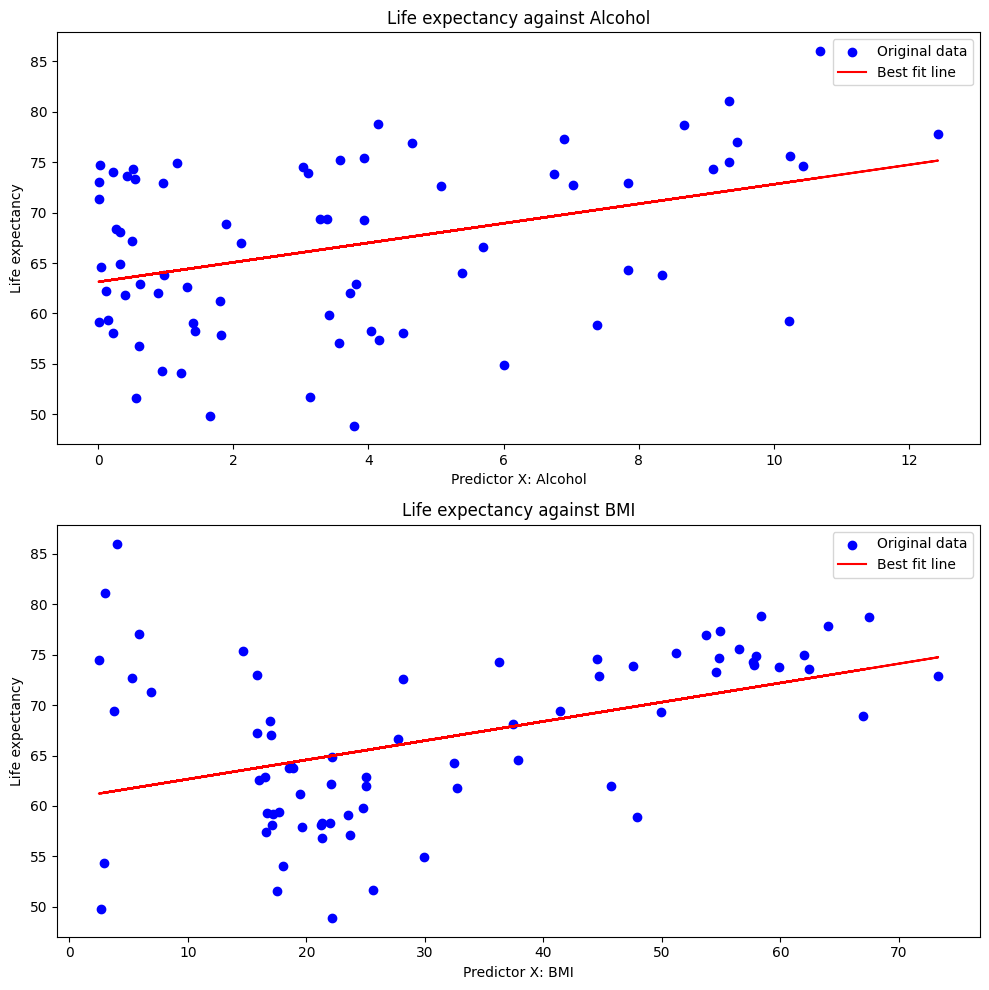

In [7]:
# Display the scatter results
# Generate predictions
Y_pred_alc = predict(X_alc, coefficients_alcohol)
Y_pred_bmi = predict(X_bmi, coefficients_BMI)

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Scatter plot for Alcohol
ax[0].scatter(X_alc, Y, color='blue', label='Original data')
ax[0].plot(X_alc, Y_pred_alc, color='red', label='Best fit line')
ax[0].set_xlabel('Predictor X: Alcohol')
ax[0].set_ylabel('Life expectancy')
ax[0].legend()
ax[0].set_title('Life expectancy against Alcohol')

# Scatter plot for BMI
ax[1].scatter(X_bmi, Y, color='blue', label='Original data')
ax[1].plot(X_bmi, Y_pred_bmi, color='red', label='Best fit line')
ax[1].set_xlabel('Predictor X: BMI')
ax[1].set_ylabel('Life expectancy')
ax[1].legend()
ax[1].set_title('Life expectancy against BMI')

# Show the plot
plt.tight_layout()
plt.show()



#### 6. Data interpretation

<div class="alert alert-block alert-success"> 
 
#### Judging by your visualisations of the data and the regression line, can you explain what the results would mean if you had to use this model to make a prediction? Does the dependency seem reasonable to you, and why / why not? <br> What could the reason for this dependency in the data be?
    
Write your answers here 

Judging by my visualisations of the data and the regression line, if the regression line accurately fits the data points, this suggests that the model can make reliable predictions. As we can see from the above two models, the data point in the BMI plot above follows the regression line more closely than the data point in the alcohol plot above. When a new data is placed into the model with the stronger positive correlation, we should be able to predict an accurate result. The dependency however seems a bit off, based on the visualisations of the data and the regression line, we are basically stating that when the BMI/alcohol is high, the life expectancy will be higher. However, we can counter the fact that when people’s BMI/alcohol is high, it means that they very likely have the medical resources to prolong their life as well due to the country that the subject live in. This could also explain why there are huge outlier in the data as well where people with lower BMI tend to live longer.
</div>


## Task 2: Multivariate Linear Regression

In this task, you will extend your program to fit a multivariate linear regression model. We again use Linear Regression to fit a model but this time with three features $x[1]=$ BMI, $x[2]=$ Alcohol, and $x[3]$= GDP. That is, 

\begin{equation}
    y \approx w[0] + w[1] x[1] + w[2] x[2] + w[3] x[3] \;. \tag{3}
\end{equation}


<div class="alert alert-block alert-info">
    
**In this task, you will work on the following points**:
    
 1. Extend your program to fit your regression model to the afore-described combination of _BMI_, _Alcohol_ and _GDP_ data loaded in Task 1. Print your results for the obtained regression coefficients $\boldsymbol{w}^\ast = \big(w[0], w[1], w[2], w[3]\big)^\top$.

 2. Now, we are intersted in evaluating the performance of our linear regression model. 
Up to now, we have fit a regression model on training data. Let’s see how good our model is when it comes to data that it hasn’t seen during training. Here we will test our linear model with data from Australia.<br>
For this, you will need to write a function **compute_sse()**, which computes the error as:
    
\begin{align}
    \boldsymbol{L}_\text{SSE} =\sum_{q} \big\|y_{q} - \boldsymbol{w}^\top \boldsymbol{x}_{q} \big\|^2\;. \tag{4}
\end{align}
 
 3. Evaluating the predictions on unseen test data from year=2002, country=Australia, measure and discuss the following:
    
    a) What is $\boldsymbol{L}_\text{SSE}$ if we only use $X$=BMI to train our model?
        
    b) What is $\boldsymbol{L}_\text{SSE}$ if we only use $X$=BMI,  $X_2$=Alcohol, and $X_3$=GDP to train our model?

    c) Thinking back to Task 1: If you could only choose **one** feature, either $X$=BMI **or** $X$=Alcohol, which one would you choose to make a prediction? Explain your reasoning.
    
    d) Of you wanted to predict  GDP from $X$=BMI, and  $X_2$=Alcohol, what would you do? 
</div>

#### 1. Obtaining coefficients for multiple linear regression (on training data from Task 1)

_Hint: Don't forget to add in the bias term!_

In [8]:
# Extending the linear regression model to fit BMI, Alcohol, and GDP is 
# as simple as concatenating these features to form a new X matrix, 
# and then calling the linearRegression_cof function with this new X and Y as arguments.

# Concatenate the features
X_combined = np.column_stack((X_bmi, X_alc, X_gdp))

# Obtain the coefficients
coefficients_combined = linearRegression_cof(X_combined, Y)

# Print the coefficients
print("w[0] (intercept term):", coefficients_combined[0])
print("w[1] (coefficient for BMI):", coefficients_combined[1])
print("w[2] (coefficient for Alcohol):", coefficients_combined[2])
print("w[3] (coefficient for GDP):", coefficients_combined[3])


w[0] (intercept term): [61.07529735]
w[1] (coefficient for BMI): [0.15446318]
w[2] (coefficient for Alcohol): [0.6899124]
w[3] (coefficient for GDP): [-0.00529543]


_Hint:_ If you wrote the function correctly, your results should be close to: $w_{0}=61.075, w_{1}=0.154, w_{2}=0.690, w_{3}=-0.005$ 

#### 2. Computing the Error to evaluate the performance of the linear regression models

In [9]:
#Compute the sum squared error
def compute_sse(y_estimate, y): 
    
    # Inputs: y_estimate is your estimated y from your linear regression model
    #         y is your actual y 
    # Output: Return your sum squared error
    
    # Compute the differences between the actual and estimated values
    diff = y - y_estimate
    
    # Compute the square of the differences
    diff_squared = diff ** 2
    
    # Sum up the squared differences to compute the SSE
    sse = np.sum(diff_squared)
    
    # Returning the value
    return sse

#### 3. Evaluating on unseen test data

In [10]:
# Load the test data for this task: Australia, year 2002
# Test BMI data:     task2_AU2002_test_bmi.npy
# Test Alcohol data: task2_AU2002_test_alc.npy
# Test GDP data:     task2_AU2002_test_gdp.npy
# Test Life expect.: task2_AU2002_test_lifeexpt.npy

# Important: Be careful NOT to confuse your training and test data! 
# Training data is for fitting the model, test data for evaluation only!

# Load the test data from drive
X_bmi_test = np.load('data/task2_AU2002_test_bmi.npy')
X_alc_test = np.load('data/task2_AU2002_test_alc.npy')
X_gdp_test = np.load('data/task2_AU2002_test_gdp.npy')
Y_test = np.load('data/task2_AU2002_test_lifeexpt.npy')

##### a) $L_{\text{SE}}$ when trained on $X=$ 'BMI'  (Coeficients from Task 1)

In [11]:
# Show your SSE value
# Generate predictions for BMI test data
Y_pred_bmi_test = predict(X_bmi_test, coefficients_BMI)

# Compute SSE for BMI
sse_bmi_test = compute_sse(Y_test, Y_pred_bmi_test)

print("SSE for BMI on test data:", sse_bmi_test)

SSE for BMI on test data: 60.5782769144324


##### b) $L_{\text{SE}}$ when trained on $X_1=$ 'BMI', $X_2=$ 'Alcohol' and $X_3=$ 'GDP'    (Coefficients from Task 1)

In [12]:
# Show your SSE value
# Concatenate test features
X_test_combined = np.column_stack((X_bmi_test, X_alc_test, X_gdp_test))

# Generate predictions for combined test data
Y_pred_test_combined = predict(X_test_combined, coefficients_combined)

# Compute SSE for combined features
sse_test_combined = compute_sse(Y_test, Y_pred_test_combined)

print("SSE for combined features on test data:", sse_test_combined)


SSE for combined features on test data: 18.682307039707897


##### c) Question

<div class="alert alert-block alert-success"> 
 
#### Thinking back to Task 1: If you could only choose **one** feature, either $X$=BMI **or** $X$=Alcohol, which one would you choose to make a prediction? Why? Explain your reasoning!
    
Write your answer here<br>
If I could choose only one feature, I would choose the BMI Feature to make a prediction. Based on the observed scatter plot above (from task 1), we can see that the data points are closer to the best fit line. This observation would indicate that there is a strong linear relationship. If the points are widely scattered around the line, it would be a weak linear relationship. We can also observe that the total number of outliers of the data points are noticeable fewer. Based on my reasoning above, we can conclude that BMI is a good feature to make a prediction.
</div>



##### d) Question

<div class="alert alert-block alert-success"> 
 
#### If you wanted to predict 'GDP' from $X_1=$ 'BMI' and $X_2=$ 'Alcohol', what would you do? Explain your reasoning and the steps to take.
    
Write your answer here <br>
General Explanation:
1) I will first load my data (basically making the X array as we did previously) and then I would fit a linear regression model on BMI and Alcohol to obtain the coefficients for the new model
2) After getting the coefficients, I could use them to make predictions on new data.
3) I would then use the coefficients and use the predict () function on those values.
4) I would then compute the SSE of the new model to check the discrepancy between the data and the estimated model using the newly found coefficient values and the newly predicted values

Python Code:
This is the Python Code that I would write.

Step 1: Concatenate BMI and Alcohol to form new X
X_new = np.column_stack((X_bmi, X_alc))

Step 2: Use GDP as Y
Y_new = X_gdp

Step 3: Obtain coefficients for new model
coefficients_new = linearRegression_cof(X_new, Y_new)

Step 4: Generate predictions for new data
Y_pred_new = predict (X_new, coefficients_new)

Step 5: Compute SSE for new model
sse_new = compute_sse(Y_new, Y_pred_new)

Step 6: Printing the output
print("SSE for predicting GDP from BMI and Alcohol:", sse_new)

</div>

    
## Task 3: Image restoration of human face pictures
In the following tasks, you will now use your knowledge of linear regression together with the functions you implemented in the previous tasks to 'complete' or 'restore' images that have been corrupted. 

We will work with a subset of the well-known Labeled Faces in the Wild (LFW) [dataset](http://vis-www.cs.umass.edu/lfw/) that comprises a selection of images depicting the faces of various celebritries. Our selected data set consists of a total number of 273 images, each with height 62px and width 47px. This data is split into 185 training and 88 test images.

<div class="alert alert-block alert-info">
    
#### In this task, you will work on the following four points:
 1. Load _'train_face_crpt.npy'_ & _'train_face_clean.npy'_ as your training data set, and _'test_face_crpt.npy'_ & _'test_face_clean.npy'_ as your test data set. Display an example image from the corrupted training set (_'train_face_crpt.npy'_) and the corrupted test set (_'test_face_crpt.npy'_) side-by-side to check the correct data import and to see what you're going to work with. <br> 
    Depending on your knowledge of celebrities, you might notice that it is quite hard to identify the person on the image, since 50% of the pixels have been corrupted! So let's reconstruct the missing data to find out who it is!
 
 2. Write a Linear Regression function _'regression_fit()'_ to fit a model using the data of the training set. Your function should take the corrupted and the uncorrupted images of your training set as arguments (you try to predict the clean image from the corrupted one).) <br>
    Note that you should re-use your previously developed _'linearRegression\_cof()'_ function from Task 1. You may **not** use pre-implemented functions from external libraries that perform linear regression! (Mathematical operations from numpy are allowed)
 
 3. To check how well your model works on unseen data, you will now use the optimised regression model to predict the missing pixels of the faces from the unseen test set (i.e., perform 'image completion'). Your _'predict()'_ function will take in the corrupted samples and regression coefficients and return the restored images. <br>
    For the 9th image of the test set (i.e., image[8]), display the uncorrupted version, the corrupted version and your reconstructed one side-by-side to compare!
 
 4.  Repeat step 3 for the training images, i.e., perform image completion, and display the results for the 6th image of the training set (i.e., image[5]) in the same side-by-side way as before.

 5.  What do you observe if you compare the image quality of the restored test image to the restored training image? Why does our regression model perform differently for these two sets? 
</div>

#### 1. Loading and displaying data

We have a total of 185 training images, each with height 62px and width 47px.


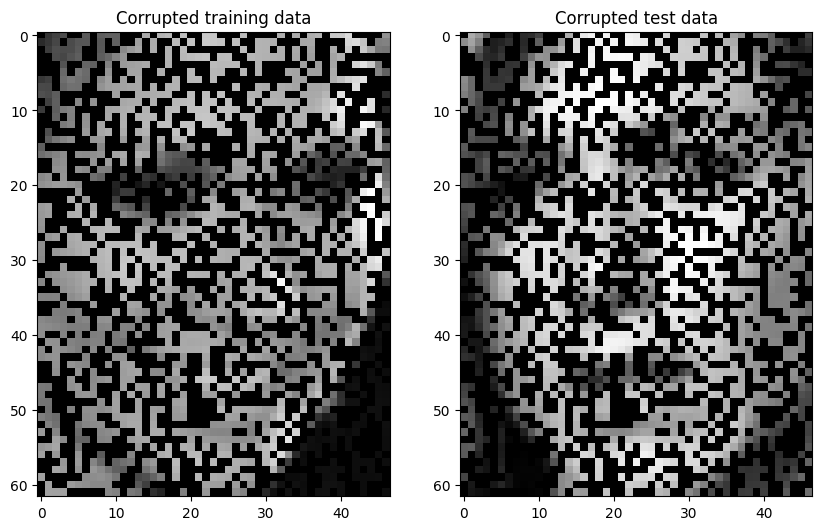

In [13]:
# ===Task3===
# Training set: Original images:    train_face_clean.npy
# Training set: Corrupted images:   train_face_crpt.npy
# Test set: Original images:        test_face_clean.npy
# Test set: Corrupted images:       test_face_crpt.npy

# Load data from drive
train_imgs_crpt = np.load('data/train_face_crpt.npy')
train_imgs_clean = np.load('data/train_face_clean.npy')
test_imgs_crpt = np.load('data/test_face_crpt.npy')
test_imgs_clean = np.load('data/test_face_clean.npy')

# Lets see what the corrupted training data looks like
# --> Visualise e.g. img[5] of the corrupted train and img[8] of the corrupted test set (but feel free to check others as well)
fig, (ax0, ax1 )= plt.subplots(1,2, figsize = (10,20))
ax0.imshow(train_imgs_crpt[5], cmap="gray")
ax0.title.set_text("Corrupted training data")
ax1.imshow(test_imgs_crpt[8], cmap="gray")
ax1.title.set_text("Corrupted test data")

n_samples, h, w = train_imgs_crpt.shape
print(f'We have a total of {n_samples} training images, each with height {h}px and width {w}px.')

#### 2. Fitting the regression model / Determining the parameters

In [14]:
# Implement regression_fit()
def linearRegression_cof(X, y, alpha=0.1):
    """
    This function computes the coefficients of the multivariate linear regression model using the normal equation.
    X: np.array of shape (N, D) - features (corrupted pixels)
    y: np.array of shape (N,) - targets (clean pixels)
    Returns:
    theta: np.array of shape (D,) - the computed coefficients
    """
    # Append a column of ones for the bias term
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # # Compute the normal equation
    # theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    # Compute the ridge regression (normal equation with regularization)
    theta = np.linalg.inv(X.T.dot(X) + alpha * np.identity(X.shape[1])).dot(X.T).dot(y)

    # Returning the value of theta
    return theta
 
# def regression_fit(samples_X, samples_Y):
#     # input arguments: 
#     #    samples_X: training samples
#     #    samples_Y: training 'labels' (uncorrupted samples)
#     # output:
#     #    reg_cof: regression coefficients (parameters)
    
#     # You may choose to call your linearRegression_cof function from task 1 if you already implemented a multivariate case

#     # Reshape the images into 2D arrays
#     samples_X = samples_X.reshape(samples_X.shape[0], -1)
#     samples_Y = samples_Y.reshape(samples_Y.shape[0], -1)
    
#     reg_cof = []
#     for i in range(samples_Y.shape[1]):
#         theta = linearRegression_cof(samples_X, samples_Y[:, i])
#         reg_cof.append(theta)

#     # Returning the value
#     return np.array(reg_cof)
def regression_fit_vectorized(samples_X, samples_Y):
    """
    This function fits a linear regression model to the data, using the normal equation method.
    samples_X: np.array of shape (N, D) - input features
    samples_Y: np.array of shape (N, P) - target features
    Returns:
    reg_cof: np.array of shape (D+1, P) - regression coefficients for each pixel
    """
    # Add a column of ones for the bias term
    X = np.hstack([np.ones((samples_X.shape[0], 1)), samples_X])

    # Compute the normal equation in a vectorized manner
    reg_cof = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(samples_Y)

    return reg_cof


In [15]:
# Retrieve the regression parameters
# reg_cof = regression_fit(train_imgs_crpt, train_imgs_clean)
# Reshape the training images to 2D arrays
train_imgs_crpt_2d = train_imgs_crpt.reshape((n_samples, h * w))
train_imgs_clean_2d = train_imgs_clean.reshape((n_samples, h * w))

# Compute the regression coefficients
reg_cof = regression_fit_vectorized(train_imgs_crpt_2d, train_imgs_clean_2d)


#### 3. Completing the corrupted images of the unseen test data by using linear regression to predict the missing pixels

In [16]:
# # Predict the missing pixels for all test images
# def predict(samples, reg_cof):
    
#     # Remember, we are dealing with the case where we have multivariate inputs AND outputs (so each pixel has its own output value) 
    
#     # input arguments: 
#     #    samples: np.array with image data, shape (N, h, w)
#     #    reg_cof: regression coefficients / parameters
#     # output:
#     #    recon_samples: np.array with image data, shape (N, h, w)

#     # Flatten each image in the samples to make them 1D
#     samples_flat = samples.reshape((samples.shape[0], -1))

#     # Add a bias term to the flattened samples
#     samples_flat_aug = np.hstack((np.ones((samples_flat.shape[0], 1)), samples_flat))
    
#     # Predict the missing pixels using the regression coefficients
#     recon_samples_flat = np.dot(samples_flat_aug, reg_cof)
    
#     # Reshape the predicted samples back to the original image dimensions
#     recon_samples_res = recon_samples_flat.reshape(samples.shape)

#     return recon_samples_res

def predict_vectorized(samples, reg_cof):
    """
    This function applies the regression model to the corrupted images to predict the missing pixels.
    samples: np.array of shape (N, h, w) - corrupted images
    reg_cof: list of np.array of shape (D+1,) - regression coefficients for each pixel
    Returns:
    recon_samples: np.array of shape (N, h, w) - reconstructed images
    """
    # Add a column of ones for the bias term
    samples_2d = np.hstack([np.ones((samples.shape[0], 1)), samples])

    # Compute the reconstructed samples using the regression model
    recon_samples_2d = samples_2d.dot(reg_cof)

    # Reshape the reconstructed samples to the original shape
    recon_samples = recon_samples_2d.reshape(samples.shape)
    
    return recon_samples


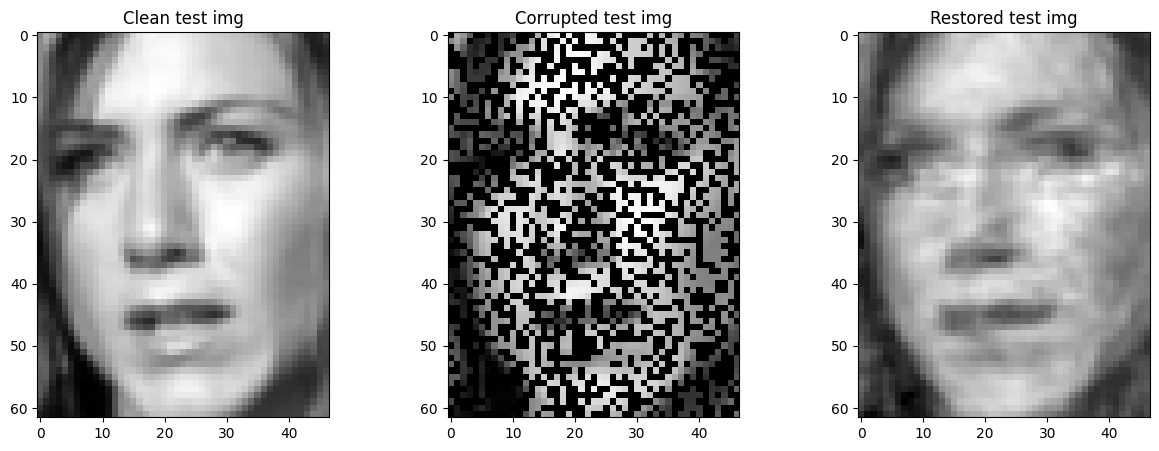

In [17]:
# Predict / Restore images of the test set
test_imgs_crpt_2d = test_imgs_crpt.reshape((-1, h * w))
test_imgs_recon_2d = predict_vectorized(test_imgs_crpt_2d, reg_cof)
test_imgs_recon = test_imgs_recon_2d.reshape(test_imgs_crpt.shape)

# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(test_imgs_clean[8], cmap="gray")
ax1.title.set_text('Clean test img')
ax2.imshow(test_imgs_crpt[8], cmap="gray")
ax2.title.set_text('Corrupted test img')
ax3.imshow(test_imgs_recon[8], cmap="gray")
ax3.title.set_text('Restored test img')
plt.show()

# # Predict / Restore images of the training set
# train_imgs_recon_2d = predict_vectorized(train_imgs_crpt_2d, reg_cof)
# train_imgs_recon = train_imgs_recon_2d.reshape(train_imgs_crpt.shape)


# # Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# # (Side-by-side plot of all three images: 'Clean test img', 'Corrupted test img', 'Restored test img')
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# ax1.imshow(train_imgs_clean[5], cmap="gray")
# ax1.title.set_text('Clean train img')
# ax2.imshow(train_imgs_crpt[5], cmap="gray")
# ax2.title.set_text('Corrupted train img')
# ax3.imshow(train_imgs_recon[5], cmap="gray")
# ax3.title.set_text('Restored train img')
# plt.show()

#### 4. Completing the corrupted training images via linear regression

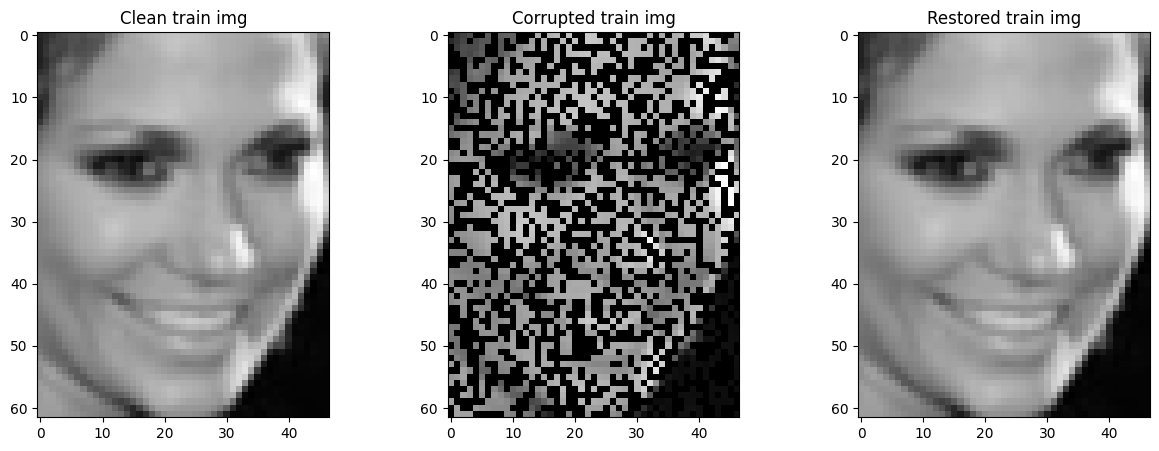

In [18]:
# Predict / Restore images of the training set
train_imgs_crpt_2d = train_imgs_crpt.reshape((-1, h * w))
train_imgs_recon_2d = predict_vectorized(train_imgs_crpt_2d, reg_cof)
train_imgs_recon = train_imgs_recon_2d.reshape(train_imgs_crpt.shape)

# Display the reconstructed versions of the previously chosen corrupted training image alongside the original and corrupted one
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(train_imgs_clean[5], cmap="gray")
ax1.title.set_text('Clean train img')
ax2.imshow(train_imgs_crpt[5], cmap="gray")
ax2.title.set_text('Corrupted train img')
ax3.imshow(train_imgs_recon[5], cmap="gray")
ax3.title.set_text('Restored train img')
plt.show()


<div class="alert alert-block alert-success"> 
 
#### What do you observe if you compare the image quality of the restored test image to the restored training image? Why does our regression model perform differently for these two sets?
    
Write your answer here <br>
The restored training image (Restored train img) looks better when compared to the restored test image (Restored test img). We can see that the resolution of the restored test image is not good and there is noise in the image. High level of noise and low resolution of the image will make the image more grainy and less detailed. This could be due to the fact that the trained model has not been trained on the supposed test set data. This could explain why the picture looks so grainy.

Our regression model performs differently for the two sets which could be due to overfitting. Overfitting occurs when a model is trained too well on a particular set of data (training set). It will not perform well on the new unseen test set. The model would have learned the specific noise and details of the training set rather than the general pattern of the image.

    
</div>

## Task 4: Peak Signal-to-Noise Ratio PSNR

The _Peak Signal to Noise Ration_ (PSNR) is defined as the ratio of the maximum possible power of a signal to the power of corrupting noise that affects representation fidelity. PSNR is most easily defined via the mean squared error (MSE). Given a noise-free $m\times n$ grayscale image $I$ and its noisy approximation $K$, the $\mathrm{MSE}$ and $\mathrm{PSNR}$ are defined as

\begin{align}
    \mathrm{MSE} &= \frac{1}{mn} \sum^{m-1}_{i=0} \sum^{n-1}_{j=0} [I(i,j)-K(i,j)]^{2} \\
    \mathrm{PSNR} &= 20 \cdot log_{10}(\mathrm{MAX}_I))-10 \cdot log_{10}(\mathrm{MSE}).
\end{align}

Note that $\mathrm{MAX}_I$ denotes the maximum possible value a pixel can have.

See this [Reference](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio) for more details.



<div class="alert alert-block alert-info">
    
#### In this task, you will conentrate on the following points:
    
 1. Implement a function _'PSNR()'_ that takes in two images to measure the Peak Signal to Noise Ratio between them. In our case, we want to measure the PSNR between a reconstructed image and its original uncorrupted version. _Hint_: Make sure to convert the image intensities to integer values ([0,255]) for this computation.
 
 2. We are again considering the 9th image of the test set from Task 3 (i.e., image[8]). Use your implemented function to measure the PSNR of your restored version of this test image. Additionally compute the PSNR of the corrupted version of this image (the 'raw corrupted' test data). 
    
 3. Now, load the additionally provided data samples _'train_face_crpt_rdm.npy'_ and _'test_face_crpt_rdm.npy'_, and visualise the 6th image of this new train set (i.e., image[5]) and the 9th image of this new test set (i.e., image[8]). If you compare these two images to the ones loaded in Task 3, you will notice that this new data is almost identical to the previously used data (ignoring the uncorrupted 'frame'), but is **corrupted with a random pattern for each image**, whereas the **previously** used images were all **corrupted by the exact same pattern**. (You can check by inspecting the train and test images you displayed in Task 3). 
    
 4. Repeat the regression fitting, prediction and visualisation from Task 3 on these new data samples. <br>
  
 5. Now again, use your implemented function to measure the PSNR of your restored version of the 9th test image (i.e., image[8]) and additionally compute the PSNR of the 'randomly' corrupted version of this image (the new 'raw corrupted' test data).  <br>

 6. Compare your PSNR and visual results from step 5 with the ones from step 2! Can you explain what might have changed that led to differences between the restored images, and why this happens?
</div>

#### 1. PSNR Implementation

In [19]:
## Implement PSNR to measure quantitative difference
# Another way of doing PSNR
def PSNR(img1, img2):
    
    # Inputs: img1 - corrupted / reconstructed image (depending on what you are calculating)
    #         img2 - clean image
    # Output: The calculated PSNR value
    # img1 = img1.astype(float)
    # img2 = img2.astype(float)
    # Making sure that 
    img1 = np.around(img1).astype(int)
    img2 = np.around(img2).astype(int)
    # img1 = img1.astype(int)
    # img2 = img2.astype(int)

    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    
    return psnr


#### 2. Calculate the PSNR for the 9th test image (i.e., image[8]) from Task 3: corrupted image and restored version

In [20]:
img_idx_test = 8
print(f'Evaluating PSNR for test image with index {img_idx_test} from Task 3.')

## Print both PSNRs for corrupted and reconstructed versions
psnr_corrupted = PSNR(test_imgs_clean[img_idx_test], test_imgs_crpt[img_idx_test])
psnr_restored = PSNR(test_imgs_clean[img_idx_test], test_imgs_recon[img_idx_test])

print(f'PSNR for corrupted image: {psnr_corrupted}')
print(f'PSNR for restored image: {psnr_restored}')

Evaluating PSNR for test image with index 8 from Task 3.
PSNR for corrupted image: 8.499659422238917
PSNR for restored image: 25.447010972071613


#### 3. Load new data corrupted with random patterns
If you closely inspect the corrupted data and compare it to the one from the previous task, you will notice that apart from the obvious uncorrupted 'frame' we added, the corruption pattern now differs from image to image!

We have a total of 185 training images, each with height 62px and width 47px.


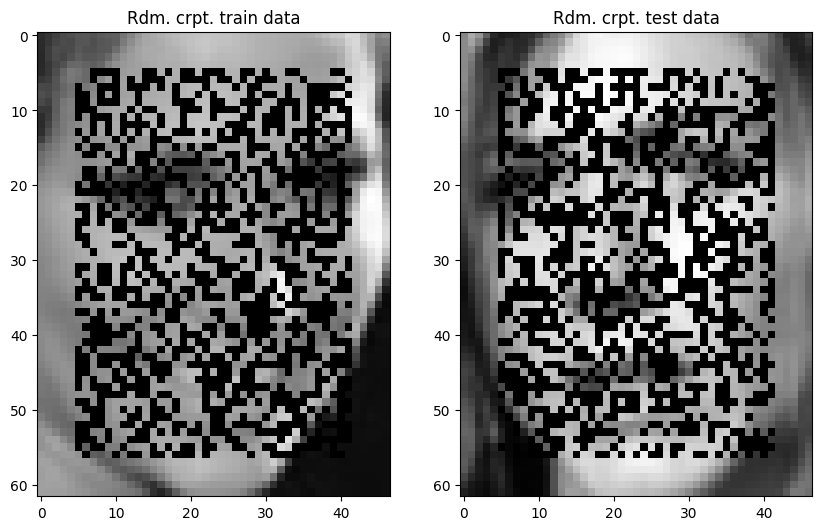

In [21]:
# Load data from drive
# Train images corrupted with random pattern: train_face_crpt_rdm.npy
# Test  images corrupted with random pattern: test_face_crpt_rdm.npy
train_imgs_crpt_rdm = np.load('data/train_face_crpt_rdm.npy')
test_imgs_crpt_rdm = np.load('data/test_face_crpt_rdm.npy')

# Lets see what the corrupted training data looks like
# --> Visualise e.g. img[5] of the corrupted train and img[8] of the corrupted test set (but feel free to check others as well)
fig, (ax0, ax1 )= plt.subplots(1,2, figsize = (10,10))
ax0.imshow(train_imgs_crpt_rdm[5], cmap="gray")
ax0.title.set_text("Rdm. crpt. train data")
ax1.imshow(test_imgs_crpt_rdm[8], cmap="gray")
ax1.title.set_text("Rdm. crpt. test data")

n_samples, h, w = train_imgs_crpt_rdm.shape
print(f'We have a total of {n_samples} training images, each with height {h}px and width {w}px.')

#### 4. Repeat regression fit and prediction on new data

In [22]:
# Retrieve the regression coefficients to reconstruct images from corrupted ones
# Reshape the data
train_imgs_crpt_rdm_2d = train_imgs_crpt_rdm.reshape((-1, h * w))

# Retrieve the regression coefficients to reconstruct images from corrupted ones
reg_cof_rdm = regression_fit_vectorized(train_imgs_crpt_rdm_2d, train_imgs_clean_2d)

In [23]:
# Predict the missing pixels for all test images
test_imgs_crpt_rdm_2d = test_imgs_crpt_rdm.reshape((-1, h * w))
test_imgs_recon_rdm_2d = predict_vectorized(test_imgs_crpt_rdm_2d, reg_cof_rdm)
test_imgs_recon_rdm = test_imgs_recon_rdm_2d.reshape(test_imgs_crpt_rdm.shape)


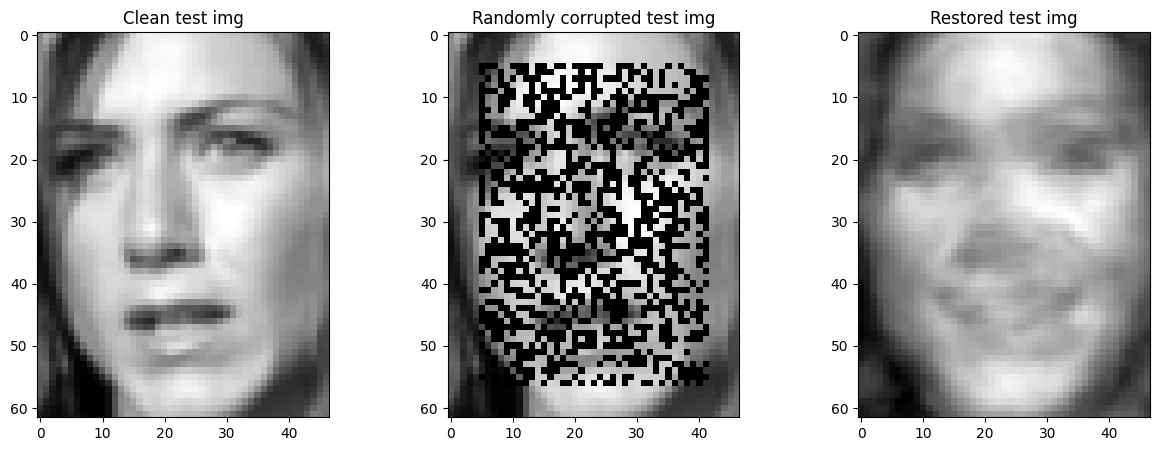

In [24]:
# Display the reconstruction results on the randomly corrupted test images
# Use the same image index as previous task so you can directly compare the results

img_idx = 8
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(test_imgs_clean[img_idx_test], cmap="gray")
ax1.title.set_text('Clean test img')
ax2.imshow(test_imgs_crpt_rdm[img_idx_test], cmap="gray")
ax2.title.set_text('Randomly corrupted test img')
ax3.imshow(test_imgs_recon_rdm[img_idx_test], cmap="gray")
ax3.title.set_text('Restored test img')
plt.show()

#### 4. Calculate the PSNR for the 9th test image (i.e., image[8]): corrupted image and restored version

In [25]:
img_idx_test = 8

In [26]:
print(f'Evaluating PSNR for test image with index {img_idx_test} from Task 3.')

## Show the two PSNR values for both corrupted and restored versions (for the randomly corrupted image)
psnr_corrupted_rdm = PSNR(test_imgs_clean[img_idx_test], test_imgs_crpt_rdm[img_idx_test])
psnr_restored_rdm = PSNR(test_imgs_clean[img_idx_test], test_imgs_recon_rdm[img_idx_test])

print(f'PSNR for randomly corrupted image: {psnr_corrupted_rdm}')
print(f'PSNR for restored image: {psnr_restored_rdm}')

Evaluating PSNR for test image with index 8 from Task 3.
PSNR for randomly corrupted image: 9.442796530924168
PSNR for restored image: 19.356665197245


##### 6. Question

<div class="alert alert-block alert-success">
    
#### Compare your PSNR and visual results from step 5 with the ones from step 2! Can you explain what might have changed that led to differences between the restored images, and why this happens?
<br><br>

    
Write your answer here <br>
By comparing the PSNR and visual results from step 5 and the ones from step 2, the changes that led to the differences between the restored images can be explained as follows:
The PSNR (Peak Signal to Noise Ratio) is the measure of quality of an image or signal, comparing the maximum possible power of signal to the power of noise present. The higher the PSNR, the higher the quality image and less noise in the image.
As we have calculated above, the PSNR for the restored version of each of the test images will be higher compared to the corrupted version. We can also notice that after repeating the regression fit and prediction on our new data, the value of the PSNR will drop, meaning that the image quality has dropped. Based on the observation of the two images, we can conclude that to be true.

This could be due to the fact that linear regression is a relatively simple model. It is not able to capture the full complexity of the data, resulting in worsening of the data even if linear regression has been carried out twice. The model is just not properly trained on different test sets which would reduce its ability to generalize new data.

</div>



# Task 5: Reconstruction from local neighbourhood
We realised in the previous task that random corruption patterns for each image prove difficult for our naive linear regression model. In this task, we want to explore the possibility to reconstruct a corrupted pixel only from its local neighbourhood. In more detail, we will predict the value of a corrupted pixel by using a window of size $5\times 11$ directly above the pixel. (This is also the reason why our 'new' corrupted images have an uncorrupted 'frame' of 5 pixels.)

<div class="alert alert-block alert-info">
    
#### To accomplish this task, you will concentrate on the following points:
    
 1. Write a function _'extract_patch()'_ to extract patches of a specific patch size directly above a pixel of interest.
    
 2. Use your patch extraction function to create a new training data set as follows: 
    
    a) For each corrupted pixel in the training images, extract a patch from the respective  uncorrupted training image directly above the pixel using your _'extract_patch()'_ function. 
    
    b) Additionally store the 'correct' ground-truth value of the corrupted pixel.
    
 3. Using this new data set, determine the regression parameters by fitting your linear regression model (Re-use the function implemented in Task 3).
    
 4. Choose one image from the unseen randomly corrupted test dataset and predict the missing pixels of this image using your new regression model. 

 5. Visualise your new and previous results side-by-side: Original Image, Image Corrupted with Random pattern, Image reconstructed with 'naive' linear regression model (Task 3), Image reconstructed with 'local' regression model (this task). Display the PSNR values for tasks 3 and 5 for the the 9th test image (\ie image[8])

Note that while the linear regression model in task 3 was used to predict the entire image, we are only predicting one image intensity at a time in this task (i.e. a scalar value)! <br>
    
**Hint**: Your reconstruction should start at the top left of the image, since the local window (or patch) above will be uncorrupted and can thus be used for the prediction. Store all your reconstructed image intensities directly in the image, so that you can use the reconstructed values of the first row to predict the intensities of the 2nd row, and so on. <br>
<br><br>
**Optional**: After finishing your reconstruction using the local window, you can: <br>

 6. Apply a mean filter over the reconstructed image by using _ndimage.uniform_filter()_ from the _scipy_ library
    
 7. Calculate the PSNR of the new reconstructed results and compare to the results you got in Task 4.

</div>


**Main idea** (concise): Parse the image and check for pixels whose value is exactly 0 (i.e. black corrupted pixel);  For each of these pixels, take the area right above in a 5x11 pixel region from the corresponding uncorrupted training image and add it to the samples list (like we did before with the entire images) -- the Y value is the corresponding intensity of the actual pixel to be reconstructed (also to be extracted from the clean image).

#### 1. Patch extraction
Create a function to extract a patch of size 'patch_size' (for us (5,11)) above the current pixel, symmetric to the left and right. A $5\times 11$ patch should e.g. go 5 pixels above, 5 to the left and 5 to the right of the current pixel.

In [27]:
def extract_patch(img, row, col, patch_size):
    
    # Inputs: img - the actual image
    #         row - which row we are extracting from
    #         col - which col we are extracting from
    #         patch_size - the size of the patch that we want to extract
    # Output : The patch
    
    half_width = patch_size[1] // 2
    patch = img[row - patch_size[0]:row, col - half_width:col + half_width + 1]
    return patch

# # Another way of implementing
# def extract_patch(img, row, col, patch_size):
    
#     # Inputs: img - the actual image
#     #         row - which row we are extracting from
#     #         col - which col we are extracting from
#     #         patch_size - the size of the patch that we want to extract
#     # Output : The patch

#     half_width = np.array([patch_size[0],(patch_size[1]-1)/2])
#     patch = img[int(row - half_width[0]):row, int(col-half_width[1]):int(col+half_width[1]+1)]
    
#     # Returning the value
#     return patch

#### 2. Extract training patches for corrupted pixels
Theoretically, we could extract a patch for each individual pixel of all images (that have a sufficiently big neighbourhood).
To reduce the use of data and speed up our computations, we will just use the first 10 images of the training set.
We will further only extract patches for pixels that are currently corrupted in these training images. Since the corruption pattern is random, this should cover a sufficient number of different pixels.

There are different ways to extract the patches, the comments below highlight one way

In [28]:
# For all images, go through each individual image (rows and cols) and find all corrupted pixels (value == 0)
# Then, extract the 5x11 patch directly above the corrupted pixel from the same image of the uncorrupted training set, 
# and add it to the new patch-based training set X;
# For the following prediction, also store the 'true' value of the pixel we want to reconstruct in the training labels set Y 
patch_size = (5,11)

# Initialising the variables
X_patches = []
Y_patches = []

 # use the first 10 images
for i in range(10):
    img_crpt = train_imgs_crpt[i]
    img_clean = train_imgs_clean[i]
    for row in range(patch_size[0], h):
        for col in range(patch_size[1]//2, w - patch_size[1]//2):
            # corrupted pixel
            if img_crpt[row, col] == 0: 
                patch = extract_patch(img_clean, row, col, patch_size)
                X_patches.append(patch.flatten())
                Y_patches.append(img_clean[row, col])

# ## Another Implementation
# patch_size = (5,11)
# patch_training_set = np.zeros((1,patch_size[0],patch_size[1]))
# patch_label_set = np.zeros((1,1))

# for k in range(10):
#     img = train_imgs_crpt_rdm[k]
#     img_clean = train_imgs_clean[k]

#     for i in range(patch_size[0],img.shape[0]):
#         for j in range(5, img.shape[1]):
#             if img[i][j] == 0:
#                 patch = extract_patch(img_clean,i,j,patch_size)
#                 patch = patch.reshape(1,patch.shape[0],patch.shape[1])
#                 patch_label = img_clean[i][j]
#                 patch_label = patch_label.reshape(1,1)
#                 patch_training_set = np.append(patch_training_set,patch,axis = 0)
#                 patch_label_set = np.append(patch_label_set,patch_label,axis = 1)

# patch_training_set = patch_training_set[1:,:,:]
# patch_label_set = patch_label_set[:,1:].T


In [29]:
# # Add all the samples to an array (similar to the original training data)
X_patches = np.array(X_patches)
Y_patches = np.array(Y_patches)

## Another Implementation
# flattened_set = patch_training_set.reshape((patch_training_set.shape[0], -1))

# X = np.ones((flattened_set.shape[0],1))
# X = np.append(X,flattened_set,axis=1)

# W = linearRegression_cof(X,patch_label_set)

#### 3. Fitting the regression model to the information of the image patches

In [30]:
# # Retrieve coefficients using our linear regression fit function from Task 3

### Testing using our own built in linear regression model
def new_linearRegression_cof(X, Y):
    
    # You should write this linearRegression_cof function based on the multivariate case, so you can use it for later tasks (ie. tasks 2-3)
    # Inputs: X - For a univariate case, this will be m * 1, for multivariate, this will be m * n
    #         Y - For a univariate case, this will be m * 1, for multivariate, this will be m * p
    # Output: The coefficients of the linear regression model

    num = np.matmul(X.T,X)
    num = np.linalg.pinv(num)
    rem = np.matmul(X.T,Y)
    W = np.matmul(num,rem)

    # returning the value
    return W

def new_regression_fit(samples_X, samples_Y):
    # input arguments: 
    #    samples_X: training samples
    #    samples_Y: training 'labels' (uncorrupted samples)
    # output:
    #    reg_cof: regression coefficients (parameters)
    
    # You may choose to call your linearRegression_cof function from task 1 if you already implemented a multivariate case
    
    # Reshaping my input samples
    samples_X = np.reshape(samples_X, (len(samples_X), -1))
    samples_Y = np.reshape(samples_Y, (len(samples_Y), -1))

    # Adding ones to X
    X = np.concatenate((samples_X, np.ones((samples_X.shape[0], 1))), axis = 1)

    # Calling the function
    reg_cof = new_linearRegression_cof(X,samples_Y)

    # Returning the values
    return reg_cof

# Retrieve the regression coefficients to reconstruct images from corrupted ones
reg_cof_patches = new_regression_fit(X_patches, Y_patches)

# ### JUST FOR CHECKING PURPOSES
# ### Testing using the built in linear regression model
# from sklearn.linear_model import LinearRegression

# # Create an instance of the LinearRegression class
# regressor = LinearRegression()

# # Fit the model to the training data
# regressor.fit(X_patches, Y_patches)

# # Retrieve the coefficients of the linear regression model
# reg_cof_patches = np.hstack((regressor.coef_, regressor.intercept_))

#### 4. Prediction / Reconstruction for ONE image of your choice
Prediction function is slightly different, since we cannot just directly predict ALL y-values! To predict a y-value, we need to have access to the window of size 5x11 right above the pixel we want to reconstruct. Intuitively, this can only be done for the first row of corrupted pixels, but not further (since the windows for the 2nd row would include corrupted pixels of the first row)! --> To solve this problem, we will reconstruct the image pixel-by-pixel using the reconstructed results of row1 to reconstruct row 2, and so on.


In [31]:
# def predict_vectorized(samples, reg_cof):
#     # Add the constant to each sample
#     samples_2d = np.hstack((samples, np.ones((samples.shape[0], 1))))
    
#     # Apply the linear regression
#     recon_samples_2d = samples_2d.dot(reg_cof)

#     return recon_samples_2d[0, 0]

# Another Implementation
def predict_vectorized(samples, reg_cof):
    # Add the constant to each sample
    samples_2d = np.hstack((samples, np.ones((samples.shape[0], 1))))
    
    # Apply the linear regression
    recon_samples = samples_2d.dot(reg_cof)

    return recon_samples[0]

## Another Implementation
# def new_predict(X, w):
#     y = np.matmul(w.T,X)

#     return y


# Let's predict for one specific test image! 
img_idx_test = 8
img_crpt_rdm = test_imgs_crpt_rdm[img_idx_test].copy()

for row in range(patch_size[0], h):
    for col in range(patch_size[1]//2, w - patch_size[1]//2):
        if img_crpt_rdm[row, col] == 0:  # corrupted pixel
            patch = extract_patch(img_crpt_rdm, row, col, patch_size)
            img_crpt_rdm[row, col] = predict_vectorized(patch.flatten().reshape(1, -1), reg_cof_patches)
            # img_crpt_rdm[row, col] = predict_vectorized(patch.flatten().reshape(1, -1), reg_cof_patches)[0, 0]
            # img_crpt_rdm[row, col] = predict_vectorized(patch.flatten().reshape(1, -1), reg_cof_patches)

# ## Another Implementation
# img_idx_test = 8
# patch_size = (5,11)
# img_crpt_rdm = test_imgs_crpt_rdm[img_idx_test].copy()
# count = 0

# for i in range(patch_size[0],img_crpt_rdm.shape[0]):
#     for j in range(5, img_crpt_rdm.shape[1]):
#         if img_crpt_rdm[i][j] == 0:
#             count = count + 1
#             patch = extract_patch(img_crpt_rdm,i,j,patch_size)
#             patch = np.reshape(patch,(-1,1))
#             patch = patch.reshape(-1,1).T
#             X = np.ones((patch.shape[0],1))
#             X = np.append(X,patch,axis = 1)
#             img_crpt_rdm[i][j] = new_predict(X.T,W)

In [32]:
# If you do not want to overwrite the original image, it is recommended you use the .copy() method from numpy arrays

#### 5. Visualisation of the results

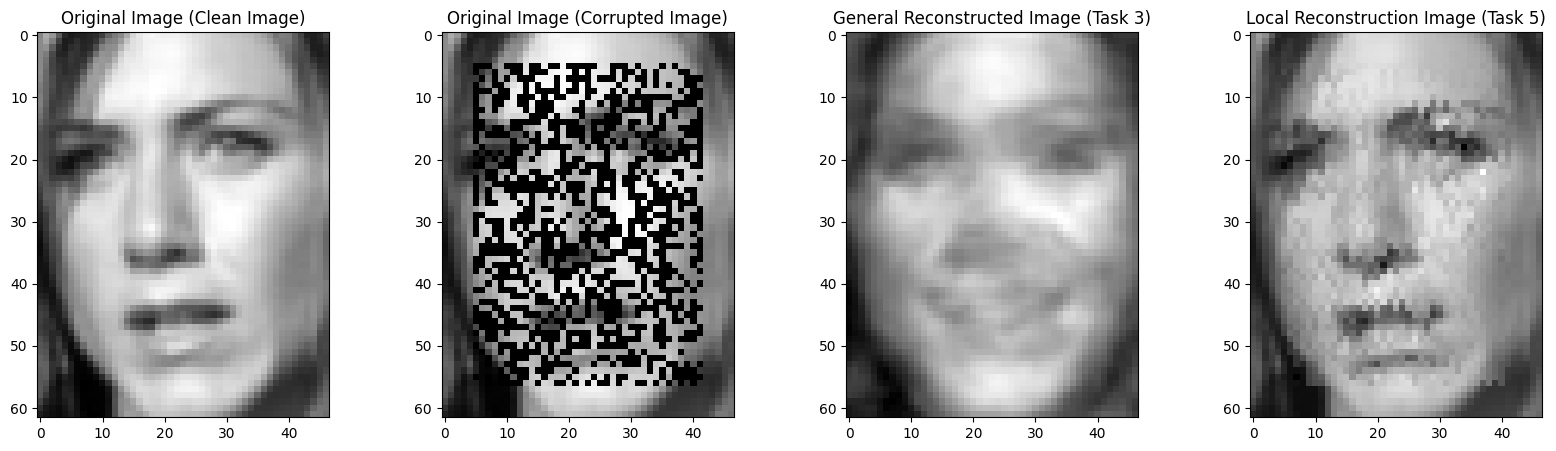

In [33]:
# Visualise all approaches
# You should display at 4 images:
# The clean one (original image)
# The randomly corrupted one (original image)
# General reconstruction (from task 3)
# Local reconstruction (from task 5)
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(test_imgs_clean[img_idx_test], cmap='gray')
axs[0].set_title('Original Image (Clean Image)')

axs[1].imshow(test_imgs_crpt_rdm[img_idx_test], cmap='gray')
axs[1].set_title('Original Image (Corrupted Image)')

axs[2].imshow(test_imgs_recon_rdm[img_idx_test], cmap='gray')
axs[2].set_title('General Reconstructed Image (Task 3)')

axs[3].imshow(img_crpt_rdm, cmap='gray')
axs[3].set_title('Local Reconstruction Image (Task 5)')

plt.show()


<div class="alert alert-block alert-success">
    
#### Compare the results you achieve with this local approach. What do you observe when you look at the reconstruction quality in the top half vs. the one in the lower half? Why is this the case?
<br><br>

    
Write your answer here
When comparing the results that I have achieved with the local approach, I have observed that the reconstruction quality in the top half is significantly better than the reconstruction quality in the lower half. As we can see from the above, the image is appearing to be smiling when the original image is not. This could be due to the fact that what we have done is a raster scan, meaning that we are scanning the image from top to bottom. The algorithm will start to reconstruct the pixels from the top. As the reconstruction process moves forward (downwards), we start to rely more on the pixel that has been reconstructed. If the reconstruction is not perfect, it will lead to small errors which will accumulate quickly into larger errors when we reached the bottom of the image. Error propagation would occur.
</div>


Show the PSNR values for tasks 3 and 5 for image[8]

In [37]:
psnr_naive = PSNR(test_imgs_clean[img_idx_test], test_imgs_recon_rdm[img_idx_test])
psnr_local = PSNR(test_imgs_clean[img_idx_test], img_crpt_rdm)

print(f'PSNR for naive model: {psnr_naive}')
print(f'PSNR for local model: {psnr_local}')

PSNR for naive model: 19.356665197245
PSNR for local model: 26.982551455424755


#### (Optional): Further image quality improvement via averaging

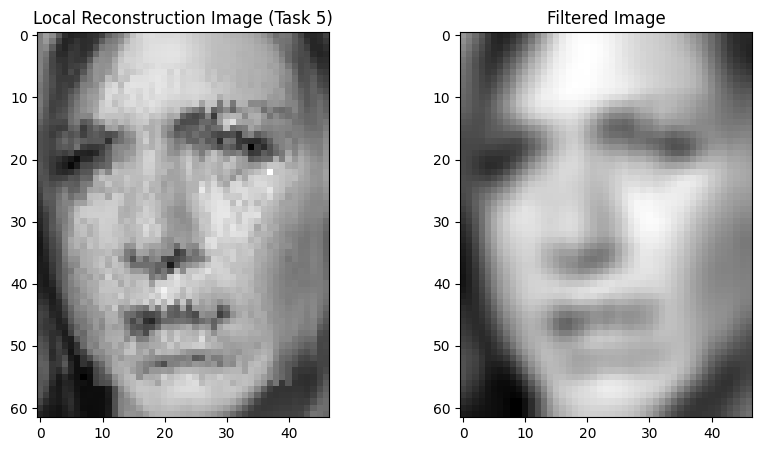

PSNR for filtered image: 25.323693769895605


In [39]:
from scipy import ndimage

# You can use the ndimage.uniform_filter to filter the results
#  Apply a mean filter over the reconstructed image and calculate the PSNR of the new reconstructed results
img_filtered = ndimage.uniform_filter(img_crpt_rdm, size=5)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_crpt_rdm, cmap='gray')
axs[0].set_title('Local Reconstruction Image (Task 5)')

axs[1].imshow(img_filtered, cmap='gray')
axs[1].set_title('Filtered Image')

plt.show()

psnr_filtered = PSNR(test_imgs_clean[img_idx_test], img_filtered)
print(f'PSNR for filtered image: {psnr_filtered}')

In [36]:
# Visualise all approaches


<div class="alert alert-block alert-warning">
    
# <center> That is all for this Lab! Congratulations!
    
</div>